In [1]:
#core python libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#ot library
import ot

#imort local files
from utils import simulate_dataset, format_dataset
from repairs import DI_list_geometric_repair, DI_list_random_repair, geometric_repair, DI_list_geometric_repair_data, DI_list_merge_repair_data, merger_repair
from disparate import *


#tools for data visualization
from sklearn.manifold import TSNE
#models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#tools for model evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import entropy
from numpy.linalg import norm

In [3]:
#colours 
blue1 = '#1f77b4' # darker blue
blue2 = '#aec7e8' # lighter blue

# Two shades of red
red1 = '#d62728' # darker red
red2 = '#ff9896' # lighter red


In [46]:
df  = pd.read_csv('german_data.data')
#head of data


# df_new = df.drop(['Unnamed: 0'], axis=1)
df_new  = df
df_new.head()





,A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
0,A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 ...
1,A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 ...
2,A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 ...
3,A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 ...
4,A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 ...


In [38]:
#romve rows with missing values
df_new = df_new.dropna()
df_new.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car


In [39]:
# #normilze credit amount so its between 0 and 1
# df_new['Credit amount'] = (df_new['Credit amount'] - df_new['Credit amount'].min()) / (df_new['Credit amount'].max() - df_new['Credit amount'].min())

#normilze duration so its between 0 and 1
df_new['Duration'] = (df_new['Duration'] - df_new['Duration'].min()) / (df_new['Duration'].max() - df_new['Duration'].min())

#normilze age so its between 0 and 1
df_new['Age'] = (df_new['Age'] - df_new['Age'].min()) / (df_new['Age'].max() - df_new['Age'].min())

#normilze credit amount so its between 0 and 1
df_new['Credit amount'] = (df_new['Credit amount'] - df_new['Credit amount'].min()) / (df_new['Credit amount'].max() - df_new['Credit amount'].min())

#normilze duration so its between 0 and 1
df_new['Duration'] = (df_new['Duration'] - df_new['Duration'].min()) / (df_new['Duration'].max() - df_new['Duration'].min())

# # convert housing to numerical
df_new['Housing'] = df_new['Housing'].map({'own': 2, 'free': 1, 'rent': 0})



#convert saving accounts to numerical
df_new['Saving accounts'] = df_new['Saving accounts'].map({'little': 2, 'moderate': 1, 'quite rich': 0, 'rich': 0})


#convert checking accounts to numerical
df_new['Checking account'] = df_new['Checking account'].map({'little': 2, 'moderate': 1, 'rich': 0})

#convert purpose to numerical
df_new['Purpose'] = df_new['Purpose'].map({'radio/TV': 0, 'education': 1, 'furniture/equipment': 2, 'car': 3, 'business': 4, 'domestic appliances': 5, 'repairs': 6, 'vacation/others': 7})





In [32]:

df_new.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,0.053571,female,2,2,2,1,0.312707,0.636364,0
3,0.464286,male,2,1,2,2,0.419110,0.545455,2
4,0.607143,male,2,1,2,2,0.253141,0.272727,3
7,0.285714,male,3,0,2,1,0.367644,0.454545,3
9,0.160714,male,3,2,2,1,0.273198,0.363636,3


In [35]:
X0 = df_new[df_new['Sex'] == 'female']
X1 = df_new[df_new['Sex']== 'male']


#target is good or bad credit


(array([ 97., 135.,  86.,  64.,  40.,  14.,  28.,  15.,  13.,   4.,   4.,
          4.,   6.,   3.,   0.,   4.,   2.,   2.,   0.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

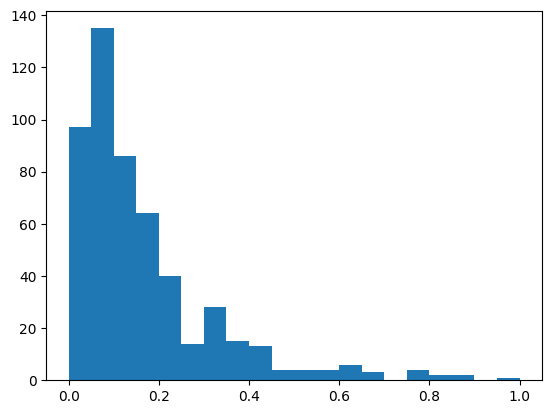

In [40]:
#histogram of credit amount

plt.hist(df_new['Credit amount'], bins=20)
